In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

/tmp/ipykernel_44623/89438716.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


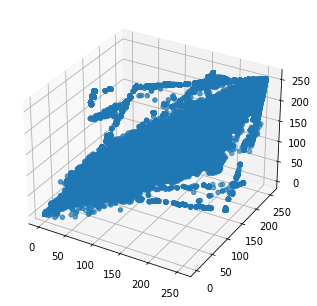

In [3]:
#read image
img = cv2.imread('image.png')

#convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#get rgb values from image to 1D array
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

[[167 161 167]
 [ 95 105 109]
 [137 125 129]
 [207 200 202]
 [ 59  62  77]
 [188 133 134]]


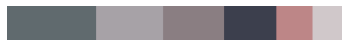

In [2]:
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)

    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    def plotClusters(self):
        #plotting 
        fig = plt.figure()
        ax = Axes3D(fig)        
        for label, pix in zip(self.LABELS, self.IMAGE):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
        plt.show()
        
    
    def plotHistogram(self):
       
        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)
       
        #create frequency count tables    
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()
        
        #appending frequencies to cluster centers
        colors = self.COLORS
        
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()] 
        
        #creating empty chart
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
        
        #creating color rectangles
        for i in range(self.CLUSTERS):
            end = start + hist[i] * 500
            
            #getting rgb values
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]
            
            #using cv2.rectangle to plot colors
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end	
        
        #display chart
        plt.figure()
        plt.axis("off")
        plt.imshow(chart)
        plt.show()
        
img = '11778.jpg'
clusters = 6
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()
print(colors)
dc.plotHistogram()

In [3]:
colors

array([[167, 161, 167],
       [ 95, 105, 109],
       [137, 125, 129],
       [207, 200, 202],
       [ 59,  62,  77],
       [188, 133, 134]])

In [40]:
def color_quantization(image, K):
# Defining input data for clustering
    data = np.float32(image).reshape((-1, 3))
# Defining criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# Applying cv2.kmeans function
    ret, label, center = cv2.kmeans(data, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(image.shape)
    return result

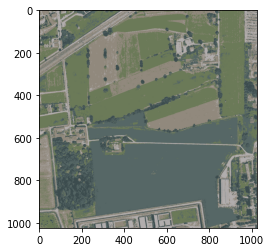

In [47]:
color_3 = color_quantization(cv2.imread('11773.jpg'), 5)
b,g,r = cv2.split(color_3)
frame_rgb = cv2.merge((r,g,b))
plt.imshow(frame_rgb)

In [48]:
cv2.imwrite('citt√†_quantizzata.jpg', cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR))

True

Numero di clusters: 1
Numero di clusters: 2
Numero di clusters: 3
Numero di clusters: 4
Numero di clusters: 5
Numero di clusters: 6
Numero di clusters: 7
Numero di clusters: 8
Numero di clusters: 9
Numero di clusters: 10
[2551295968.8910146, 1031029149.771896, 732691275.1836731, 517215768.20796114, 397478548.8161096, 324712656.40141225, 275554349.05693406, 249804863.9595557, 226390563.81801036, 204483580.40665436]


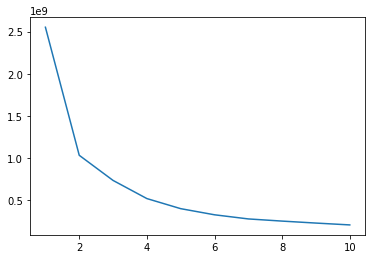

In [49]:
from sklearn.cluster import KMeans
import numpy as np

img=cv2.imread('11773.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=img.reshape((img.shape[1]*img.shape[0],3))

md=[]
for i in range(1,11):
    print('Numero di clusters: '+ str(i))
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(img)
    o=kmeans.inertia_
    md.append(o)
print(md)
plt.plot(list(np.arange(1,11)),md)
plt.show()

3


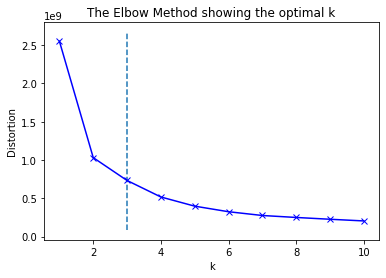

In [61]:
from kneed import KneeLocator
kn = KneeLocator(list(np.arange(1,11)), md, S=1.0, curve='convex', direction='decreasing', online=True)
print(kn.knee)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.plot(list(np.arange(1,11)), md, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [6]:
kmeans.cluster_centers_

array([[136.88216869, 122.32133952, 124.65379415],
       [ 54.96268739,  57.90914096,  74.98106055],
       [185.80989908, 176.29162452, 179.36728693],
       [ 96.71207677, 110.17337786, 120.34620288],
       [ 88.63287596,  92.88130299,  90.85193336],
       [156.22592911, 152.12666592, 158.78992283],
       [217.69652975, 211.91974674, 214.17569012],
       [188.55498582, 133.04731253, 134.56511383]])

In [26]:
img=cv2.imread('image.png')
print(img.shape)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
X=img.reshape((img.shape[1]*img.shape[0],3))

y_pred = kmeans.predict(X)
y_pred = y_pred.reshape((img.shape[0], img.shape[1]))
print(y_pred.shape)

#new_image=kmeans.cluster_centers_[kmeans.labels_]
#print(new_image.shape)
#new_image=new_image.reshape((img.shape))

(768, 1366, 3)
(768, 1366)


In [32]:
kmeans.cluster_centers_.astype(int)[kmeans.labels_]

array([[ 88,  92,  90],
       [ 88,  92,  90],
       [ 88,  92,  90],
       ...,
       [188, 133, 134],
       [188, 133, 134],
       [188, 133, 134]])

In [22]:
from skimage import io
from sklearn.cluster import KMeans


img = io.imread('11778.jpg')
img_r = (img / 255.0).reshape(-1,3)
k_colors = KMeans(n_clusters=8).fit(img_r) 
y_pred=k_colors.predict(img_r)

In [25]:
k_colors.cluster_centers_

array([[0.54087749, 0.48007246, 0.49137424],
       [0.21256707, 0.22404627, 0.29196171],
       [0.72690213, 0.69031683, 0.70265278],
       [0.38346581, 0.4327224 , 0.46482172],
       [0.74146364, 0.52315177, 0.52861576],
       [0.61201683, 0.5960629 , 0.62225257],
       [0.85269975, 0.82984158, 0.83867881],
       [0.33868905, 0.35522744, 0.35361409]])

array([0, 0, 0, ..., 4, 4, 4])

In [66]:
from skimage import io
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np
import os
from tqdm.notebook import tqdm
import pathlib



for path, subdirs, files in os.walk(r"C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\"):
    for name in files:
        if name.endswith('.jpg'):
            print(os.path.join(path, name))
            img = io.imread(os.path.join(path, name))
            img_r = (img / 255.0).reshape(-1,3) 
            print(img_r.shape)
            k_colors = KMeans(n_clusters=10, init = 'k-means++').fit(img_r) 
            y_pred=k_colors.predict(img_r)
            newimg=k_colors.cluster_centers_[k_colors.labels_]
            #newimg = np.clip(newimg.astype('uint8'), 0, 255)
            newimg=np.reshape(newimg, (img.shape))

            #fig = plt.figure(figsize=(10,10)) 
            #ax=fig.add_subplot(1,2,1,xticks=[],yticks=[],title='Original Image') 
            #ax.imshow(img) 
            #ax=fig.add_subplot(1,2,2,xticks=[],yticks=[],title='Color Compressed Image using K-Means') 
            #ax.imshow(newimg) 
            #plt.show()
            pathlib.Path(path.replace('immagini\\', 'immagini_segmentate')).mkdir(parents=True, exist_ok=True) 
            io.imsave(os.path.join(path, name).replace('immagini\\', 'immagini_segmentate'), newimg)

C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11771.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11772.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11773.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11774.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11775.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11776.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11777.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11778.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11779.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11780.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11781.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11782.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11783.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11784.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11785.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17075\11786.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11771.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11772.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11773.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11774.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11775.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11776.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11777.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11778.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11779.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11780.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11781.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11782.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11783.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11784.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11785.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17076\11786.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11771.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11772.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11773.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11774.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11775.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11776.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11777.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11778.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11779.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11780.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11781.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11782.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11783.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11784.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11785.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17077\11786.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11771.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11772.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11773.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11774.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11775.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11776.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11777.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11778.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11779.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11780.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11781.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11782.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11783.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11784.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11785.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17078\11786.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11771.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11772.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11773.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11774.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11775.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11776.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11777.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11778.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11779.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11780.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11781.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11782.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11783.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11784.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11785.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17079\11786.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11771.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11772.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11773.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11774.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11775.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11776.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11777.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11778.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11779.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11780.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11781.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11782.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11783.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11784.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11785.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17080\11786.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11771.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11772.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11773.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11774.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11775.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11776.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11777.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11778.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11779.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11780.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11781.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11782.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11783.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11784.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11785.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17081\11786.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11771.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11772.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11773.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11774.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11775.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11776.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11777.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11778.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11779.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11780.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11781.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11782.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11783.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11784.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11785.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17082\11786.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11771.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11772.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11773.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11774.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11775.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11776.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11777.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11778.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11779.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11780.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11781.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11782.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11783.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11784.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11785.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17083\11786.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11771.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11772.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11773.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11774.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11775.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11776.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11777.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11778.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11779.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11780.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11781.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11782.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11783.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11784.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11785.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17084\11786.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11771.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11772.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11773.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11774.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11775.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11776.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11777.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11778.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11779.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11780.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11781.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11782.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11783.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11784.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11785.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17085\11786.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11771.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11772.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11773.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11774.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11775.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11776.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11777.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11778.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11779.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11780.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11781.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11782.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11783.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11784.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11785.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17086\11786.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11771.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11772.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11773.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11774.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11775.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11776.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11777.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11778.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11779.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11780.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11781.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11782.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11783.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11784.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11785.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


C:\Users\Francesco Manghi\Documents\GITHUB\Kmeans_roofs_segmentation\immagini\\17087\11786.jpg
(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [64]:
img = io.imread('11778.jpg')
img_r = (img / 255.0).reshape(-1,3) 
print(img_r.shape)
k_colors = KMeans(n_clusters=10, init = 'k-means++').fit(img_r) 
y_pred=k_colors.predict(img_r)
newimg=k_colors.cluster_centers_[k_colors.labels_]
#newimg = np.clip(newimg.astype('uint8'), 0, 255)
newimg=np.reshape(newimg, (img.shape))
io.imsave('citta_quantizzata.jpg', newimg)

(1048576, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
